In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [70]:
df = pd.read_csv("teleCust1000t.csv")
print(df.shape)
df.head()

(1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [71]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

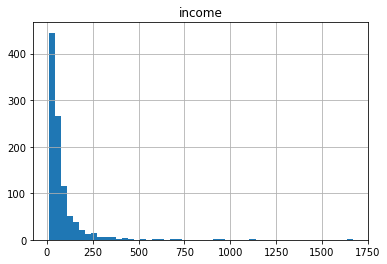

In [72]:
df.hist(column="income", bins=50)

In [73]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [74]:
X = df[
    [
        "region",
        "tenure",
        "age",
        "marital",
        "address",
        "income",
        "ed",
        "employ",
        "retire",
        "gender",
        "reside",
    ]
].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [75]:
y = df["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3])

In [76]:
print(X[0:5])
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
print(X[0:5])

[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]
[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=4)


In [81]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y[0:5])

[1 1 3 2 4]
[1 4 3 1 3]


In [82]:
from sklearn import metrics

In [83]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [84]:
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for i in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[i - 1] = metrics.accuracy_score(y_test, yhat)

    std_acc[i - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

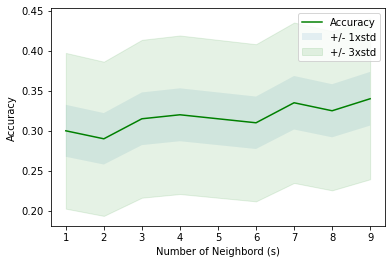

In [95]:
plt.plot(range(1, Ks), mean_acc, "g")
plt.fill_between(
    range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10
)
plt.fill_between(
    range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="g"
)
plt.legend(("Accuracy", "+/- 1xstd", "+/- 3xstd"))
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbord (s)")
plt.tight_layout
plt.show()

In [101]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)

The best accuracy was with 0.34 with k= 9
